# Disaster Tweets Notebook Again

Predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

### Types of Disaster
* Geophysical (e.g. Earthquakes, Landslides, Tsunamis and Volcanic Activity)
* Hydrological (e.g. Avalanches and Floods)
* Climatological (e.g. Extreme Temperatures, Drought and Wildfires)
* Meteorological (e.g. Cyclones and Storms/Wave Surges)
* Biological (e.g. Disease Epidemics and Insect/Animal Plagues)

In [1]:
disaster_list = ['tsunami', 'disasters', 'volcano', 'tornado', 'avalanche', 'earthquake', 
                 'blizzard', 'drought', 'bushfire', 'tremor', 'dust storm', 'storm', 'magma',
                 'twister', 'windstorm', 'heat wave', 'cyclone', 'forest fire', 'flood', 'fire',
                 'hailstorm', 'lava', 'lightning', 'high-pressure', 'hail', 'hurricane', 
                 'seismic', 'erosion', 'whirlpool', 'Richter scale', 'whirlwind', 'dark cloud', 
                 'thunderstorm', 'barometer', 'gale', 'blackout', 'gust', 'force', 'low-pressure',
                 'volt', 'snowstorm', 'rainstorm', 'storm', 'nimbus', 'violent storm', 'sandstorm',
                 'casualty', 'Beaufort scale', 'fatal', 'fatality', 'cumulonimbus', 'death', 'lost',
                 'destruction', 'tension', 'cataclysm', 'damage', 'uproot', 'underground', 'destroy',
                 'arsonist', 'wind scale', 'arson', 'rescue', 'permafrost', 'fault', 'drown']

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import string, re
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Data

In [7]:
train = pd.read_csv('data/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test = pd.read_csv('data/test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
test.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [10]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [11]:
submission.describe()

,id,target
count,3263.000000,3263.0
mean,5427.152927,0.0
std,3146.427221,0.0
min,0.000000,0.0
25%,2683.000000,0.0
50%,5500.000000,0.0
75%,8176.000000,0.0
max,10875.000000,0.0


# Exploration

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [13]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [14]:
train.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
body%20bags              41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [15]:
train.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

"A space is assigned number 32, which is 20 in hexadecimal. When you see “%20,” it represents a space in an encoded URL"

In [16]:
train.text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [17]:
train.text[1]

'Forest fire near La Ronge Sask. Canada'

In [18]:
train.text[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [19]:
train.keyword.count()

7552

In [20]:
train.keyword.count()/len(train)

0.9919873899908052

In [21]:
test.keyword.count()/len(test)

0.9920318725099602

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [23]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

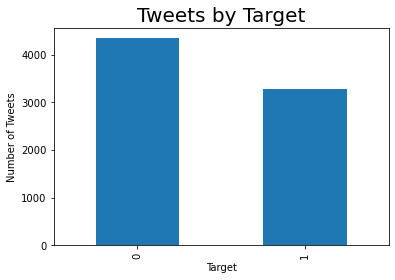

In [24]:
train.target.value_counts().plot(kind='bar')
plt.xlabel('Target')  
plt.ylabel('Number of Tweets')  
plt.title("Tweets by Target", fontsize=20,) 
plt.show()

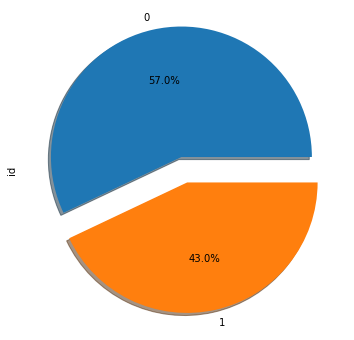

In [25]:
fig = plt.figure(figsize=(8,6))
train.groupby('target').id.count().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [27]:
#pip install wordcloud

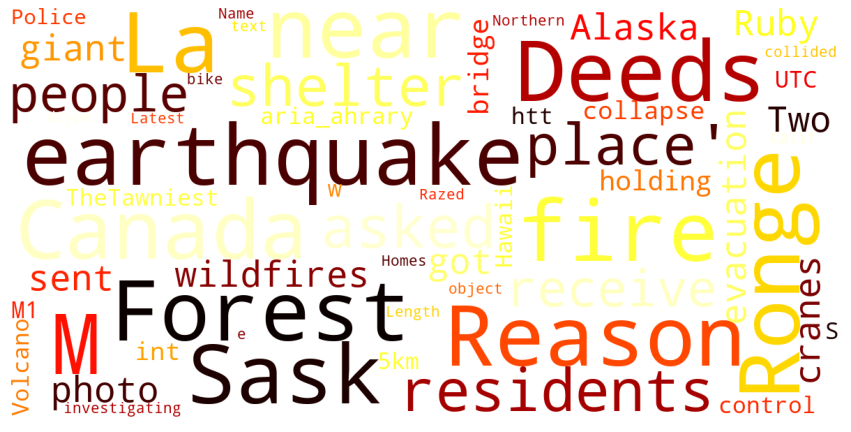

In [32]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_font_size=40,
        max_words=150,
        colormap='hot',
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['text'])

Text(0.5, 0.98, 'Average Tweet Length')

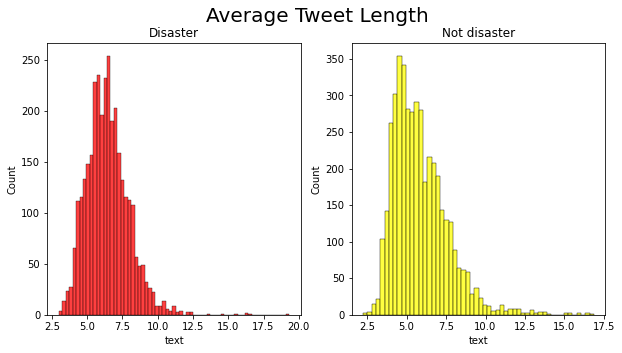

In [33]:
import seaborn as sns

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train[train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Disaster')
word=train[train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='yellow')
ax2.set_title('Not disaster')
fig.suptitle('Average Tweet Length', fontsize='20')


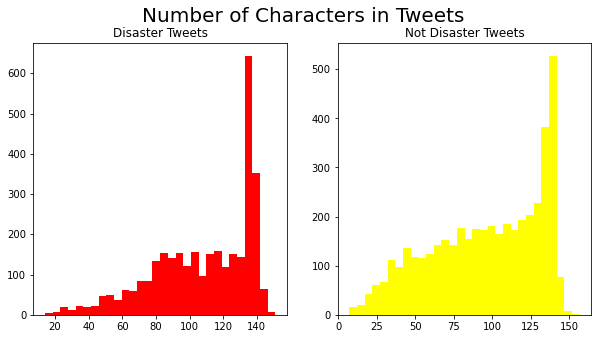

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red',bins=30)
ax1.set_title('Disaster Tweets')
tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='yellow',bins=30)
ax2.set_title('Not Disaster Tweets')
fig.suptitle('Number of Characters in Tweets', fontsize='20')
plt.show()

# Cleaning

In [ ]:
# Word tokenize didn't work
#from nltk.tokenize import word_tokenize
#train['tokenized_text'] = train['text'].apply(word_tokenize) 
#train.head()

In [ ]:
# TweetTokenizer didn't work either
#from nltk.tokenize import TweetTokenizer
#tt = TweetTokenizer()
#train['token_tweets'] = train['text'].apply(tt.tokenize)
#train.head()

In [ ]:
# Remove all hyphens and quotes - needs to be in a loop!
# pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
# train['text_tokens_raw'] = nltk.regexp_tokenize(train['text'], pattern)

In [37]:
def decontracted(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [38]:
# Fix contractions
train['text'] = train['text'].apply(decontracted)

In [39]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    return text

In [40]:
# Fix html
train['text'] = train['text'].apply(remove_html_tags)

In [41]:
def remove_urls(text):
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', text)
    return text

In [42]:
# Fix urls
train['text'] = train['text'].apply(remove_urls)

In [43]:
# Slang abbreviations
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "after midday",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [44]:
def fix_slangs(text):
    text = text.lower()
    sentence_list = text.split()
    new_sentence = []
    
    for word in sentence_list:
        for candidate_replacement in abbreviations:
            if (candidate_replacement == word):
                word = word.replace(candidate_replacement, abbreviations[candidate_replacement])
        new_sentence.append(word) 
  
    return (" ".join(new_sentence))

In [45]:
# Run fix slang
train['text'] = train['text'].apply(fix_slangs)

In [52]:
def remove_punctuation(text):
    #replace every punctuation with a whitespace to keep the words correct
    text = re.sub(r'[^\w\s]',' ',text)
    #remove the successive whitespaces
    _RE_COMBINE_WHITESPACE = re.compile(r"\s+")
    no_punc = _RE_COMBINE_WHITESPACE.sub(" ", text).strip()
    return no_punc

In [53]:
# Run remove punct
train['text'] = train['text'].apply(remove_punctuation)

In [65]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [74]:
def remove_stop_words(text):
    stopwords_list = stopwords.words('english')
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    #convert all the text to lowercase
    text = text.lower()
    sentence_list = text.split()
    new_sentence = []
    
    for word in sentence_list:
        for stop_word in stopwords_list:
            if (stop_word == word):
                word = re.sub(stop_word, '', word)
        new_sentence.append(word) 
    return (" ".join(new_sentence))

In [75]:
# Run stopwords
train['text'] = train['text'].apply(remove_stop_words)

In [78]:
def remove_digits(text):
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    return text

In [79]:
# Run remove numbers
train['text'] = train['text'].apply(remove_digits)

In [80]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked ishelter place notified office...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


In [59]:
sample1 = train.text.head()
sample1

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to ishelter in place are b...
3    13 000 people receive wildfires evacuation ord...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [60]:
sample = train.text[40:44]
sample 

40                                 check these out nsfw
41    on the outside you are ablaze and alive but yo...
42    had an awesome time visiting the cfc head offi...
43               soooo pumped for ablaze southridgelife
Name: text, dtype: object

In [61]:
token_https = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', sample[40], 
                         flags=re.MULTILINE)
token_https

'check these out nsfw'

In [62]:
# Trying to seperate all the words
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
token_pattern = nltk.regexp_tokenize(token_https, pattern)
token_pattern

['check', 'these', 'out', 'nsfw']

In [63]:
# Make all words lower case
token_pattern_lower = [word.lower() for word in token_pattern]
token_pattern_lower

['check', 'these', 'out', 'nsfw']

In [64]:
# Remove all stopwords, punctuation, and numbers
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

token_pattern_lower_stopless = [word for word in token_pattern_lower if word not in stopwords_list]
token_pattern_lower_stopless

AttributeError: 'set' object has no attribute 'words'

In [ ]:
# Regex seperation
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# Remove all stopwords, punctuation, and numbers
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Create new column
new_list = []

# Loop through df
for i in range(len(train.text)):
    token_https = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', train.text[i], 
                         flags=re.MULTILINE)
    token_pattern = nltk.regexp_tokenize(token_https, pattern)
    token_pattern_lower = [word.lower() for word in token_pattern]
    token_pattern_lower_stopless = [word for word in token_pattern_lower if word not in stopwords_list]
    new_list.append(token_pattern_lower_stopless)

In [ ]:
# Add column to df
train['cleaned_text'] = new_list
train.head()

In [ ]:
# add an empty columns 
train = train.reindex(columns = train.columns.tolist() + ['new_text'])
train.head()                      

In [ ]:
for i in range(len(train.cleaned_text)):
    train['new_text'][i] = ", ".join(train.cleaned_text[i])

In [ ]:
train.head()

In [ ]:
train.new_text[44]

In [ ]:
train.cleaned_text[44]

In [ ]:
train.text[44]

In [ ]:
total_words = []
for i in range(len(train.cleaned_text)):
    total_words += train.cleaned_text[i]

In [ ]:
len(total_words)

In [ ]:
word_freqdist = FreqDist(total_words)
word_freqdist.most_common(100)

In [47]:
# Create a corpus of words for target text (before ceaning)
def create_corpus(df,target):
    corpus=[]
    
    for x in df[df['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<AxesSubplot:>

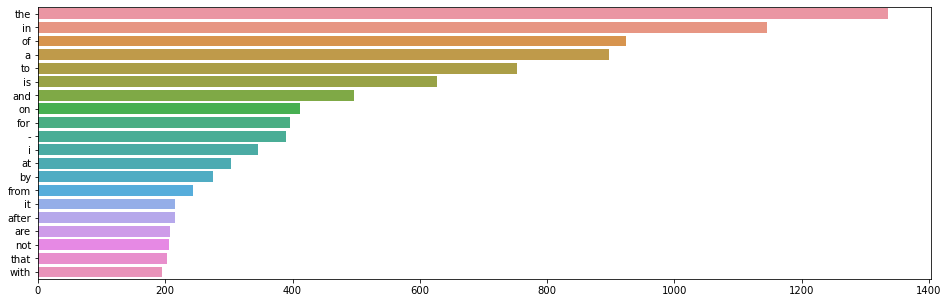

In [48]:
# The most frequent 20 words when target is not disaster or 0 
import collections

allWords=create_corpus(train,target=1)
vocabulary= set(allWords)
vocabulary_list= list(vocabulary)

plt.figure(figsize=(16,5))
counter=collections.Counter(allWords)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    x.append(word)
    y.append(count)
sns.barplot(x=y,y=x)

In [49]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to ishelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [50]:
# Create a corpus of target words (cleaned)
def create_corpus(df,target):
    corpus=[]
    
    for x in df[df['target']==target]['new_text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [51]:
# The most frequent 20 words when target is disaster or 1 
import collections

allWords=create_corpus(train,target=1)
vocabulary= set(allWords)
vocabulary_list= list(vocabulary)

plt.figure(figsize=(16,5))
counter=collections.Counter(allWords)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    x.append(word)
    y.append(count)
sns.barplot(x=y,y=x)

KeyError: 'new_text'

# Model 1

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# "Term Frequency Inverse Document Frequency"
vectorizer = TfidfVectorizer()

In [ ]:
tf_idf_data_train = vectorizer.fit_transform(train.text)

In [ ]:
# I can't get the vectorize to work on my cleaned lists!
#tf_idf_data_train_cleaned = vectorizer.fit_transform(train.cleaned_text)

In [ ]:
tf_idf_data_test = vectorizer.transform(test.text)

In [ ]:
tf_idf_data_train.shape

In [ ]:
tf_idf_data_test.shape

In [ ]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
target = train.target

In [ ]:
# Naive Bayes
nb_classifier.fit(tf_idf_data_train, target)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [ ]:
# Random Forest
rf_classifier.fit(tf_idf_data_train, target)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

In [ ]:
nb_train_score = accuracy_score(train.target, nb_train_preds)
#nb_test_score = accuracy_score(test.target, nb_test_preds)

rf_train_score = accuracy_score(train.target, rf_train_preds)
#rf_test_score = accuracy_score(test.target, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

In [ ]:
# My test data doesn't have a target!

# Model 2

In [81]:
# Set the target
y = train.target

In [82]:
# Set the labels
X = train.text

In [83]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [84]:
vectorizer = TfidfVectorizer()

In [85]:
tfidf_train2 = vectorizer.fit_transform(X_train)

In [86]:
tfidf_test2 = vectorizer.transform(X_test)

In [87]:
tfidf_train2.shape

(5709, 13842)

In [88]:
tfidf_test2.shape

(1904, 13842)

In [89]:
# Naive Bayes
nb_classifier = MultinomialNB()

In [90]:
nb_classifier.fit(tfidf_train2, y_train)
nb_train_preds2 = nb_classifier.predict(tfidf_train2)
nb_test_preds2 = nb_classifier.predict(tfidf_test2)

In [94]:
nb_train_score2 = accuracy_score(y_train, nb_train_preds2)
nb_test_score2 = accuracy_score(y_test, nb_test_preds2)
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score2, nb_test_score2))

Multinomial Naive Bayes
Training Accuracy: 0.9089 		 Testing Accuracy: 0.8036


In [91]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100)

In [92]:
rf_classifier.fit(tfidf_train2, y_train)
rf_train_preds2 = rf_classifier.predict(tfidf_train2)
rf_test_preds2 = rf_classifier.predict(tfidf_test2)

In [95]:
rf_train_score2 = accuracy_score(y_train, rf_train_preds2)
rf_test_score2 = accuracy_score(y_test, rf_test_preds2)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score2, rf_test_score2))

Random Forest
Training Accuracy: 0.989 		 Testing Accuracy: 0.791


# Model 3

In [ ]:
# Set the target
y = train.target

In [ ]:
# Set the labels
X = train.new_text

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
tf_idf_data_train3 = vectorizer.fit_transform(X_train)

In [ ]:
tf_idf_data_test3 = vectorizer.transform(X_test)

In [ ]:
tf_idf_data_train3.shape

In [ ]:
tf_idf_data_test3.shape

In [ ]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [ ]:
# Naive Bayes
nb_classifier.fit(tf_idf_data_train3, y_train)
nb_train_preds3 = nb_classifier.predict(tf_idf_data_train3)
nb_test_preds3 = nb_classifier.predict(tf_idf_data_test3)

In [ ]:
# Random Forest
rf_classifier.fit(tf_idf_data_train3, y_train)
rf_train_preds3 = rf_classifier.predict(tf_idf_data_train3)
rf_test_preds3 = rf_classifier.predict(tf_idf_data_test3)

In [ ]:
nb_train_score3 = accuracy_score(y_train, nb_train_preds3)
nb_test_score3 = accuracy_score(y_test, nb_test_preds3)

rf_train_score3 = accuracy_score(y_train, rf_train_preds3)
rf_test_score3 = accuracy_score(y_test, rf_test_preds3)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score3, nb_test_score3))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score3, rf_test_score3))

# Model 4

In [96]:
from sklearn import linear_model

In [98]:
# Linear Ridge
rd_clf = linear_model.RidgeClassifier()

In [99]:
rd_clf.fit(tfidf_train2, y_train)
rd_clf_train_preds2 = rd_clf.predict(tfidf_train2)
rd_clf_test_preds2 = rd_clf.predict(tfidf_test2)

In [100]:
rd_clf_train_score2 = accuracy_score(y_train, rd_clf_train_preds2)
rd_clf_test_score2 = accuracy_score(y_test, rd_clf_test_preds2)

print('Linear Ridge')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rd_clf_train_score2, rd_clf_test_score2))

Linear Ridge
Training Accuracy: 0.9622 		 Testing Accuracy: 0.8051


# Model 5

In [101]:
from sklearn.svm import SVC

In [102]:
# Support Vector Classifier
svc_clf=SVC()

In [103]:
svc_clf.fit(tfidf_train2, y_train)
svc_clf_train_preds2 = svc_clf.predict(tfidf_train2)
svc_clf_test_preds2 = svc_clf.predict(tfidf_test2)

In [105]:
svc_clf_train_score2 = accuracy_score(y_train, svc_clf_train_preds2)
svc_clf_test_score2 = accuracy_score(y_test, svc_clf_test_preds2)

print('Support Vector Classifier')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(svc_clf_train_score2, svc_clf_test_score2))

Support Vector Classifier
Training Accuracy: 0.9686 		 Testing Accuracy: 0.812


# Submission 

In [107]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [108]:
test['text'] = test['text'].apply(decontracted)
test['text'] = test['text'].apply(remove_html_tags)
test['text'] = test['text'].apply(remove_urls)
test['text'] = test['text'].apply(fix_slangs)
test['text'] = test['text'].apply(remove_punctuation)
test['text'] = test['text'].apply(remove_stop_words)
test['text'] = test['text'].apply(remove_digits)

In [109]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ...
2,3,NaN,NaN,forest fire spot pond geese fleeing acros...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan


In [110]:
submission_test_2 = vectorizer.transform(test.text)

In [111]:
test["target"] = svc_clf.predict(submission_test_2)

In [112]:
my_submission_2 = test[['id', 'target']]

In [113]:
my_submission_2.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [114]:
my_submission_2.to_csv('submission2.csv',index=False)

In [ ]:
my submission_2.png


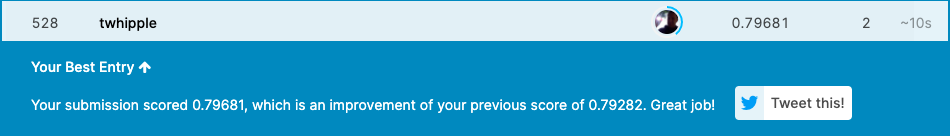

In [116]:
from IPython.display import Image
Image(filename='Images/my submission_2.png') 

In [117]:
submission_test_3 = vectorizer.transform(test.text)

In [118]:
test["target"] = rd_clf.predict(submission_test_3)

In [119]:
my_submission_3 = test[['id', 'target']]

In [120]:
my_submission_3.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [121]:
my_submission_3.to_csv('submission3.csv',index=False)

# Conclusion

I first tried to separate all the words in the text file, then get rid of numbers and symbols. Then I spent some time trying to get rid of the https links and all of the webpages. Finally I made all the words lowercase. I tried two different Tweet processing methods but neither of them worked - perhaps because the string of text had been changed to a list.

Using the TfidfVectorizer along with my nltk cleaning that was somehow joined again to a string I was able to improve my testing accuracy for the Naive Bayes which went from 79.94% to 80.51%. The Random Forest testing accuracy also went up from 77.73% to 78.83%. Neither are great and both are only slight improvements, but nevertheless heading in the right direction. I still have some more cleaning issues to deal with - since a bunch of the word vectors seemed to be just letters.

# Future Work